## Setting Up Environment

In [87]:
import torch
import torchvision
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt

from pathlib import Path

from torch.utils.data import DataLoader


In [88]:
data_path = Path("DATASET/")

train_image_dir = data_path / "TRAIN"
test_image_dir = data_path / "TEST"

train_image_dir, test_image_dir


(WindowsPath('DATASET/TRAIN'), WindowsPath('DATASET/TEST'))

### Visualize Image

In [89]:
import os

for dirpath, dirname, filename in os.walk(data_path):
    print(dirpath, dirname, len(filename))



DATASET ['TEST', 'TRAIN'] 0
DATASET\TEST ['Organic', 'Recyclable'] 0
DATASET\TEST\Organic [] 1401
DATASET\TEST\Recyclable [] 1112
DATASET\TRAIN ['Organic', 'Recyclable'] 0
DATASET\TRAIN\Organic [] 12565
DATASET\TRAIN\Recyclable [] 9999


In [90]:
import random
from PIL import Image

# Set random seet
image_path_list = list(data_path.glob("*/*/*.jpg"))
image_path_list

sample_path_list = random.sample(image_path_list, k=10)
sample_path_list



[WindowsPath('DATASET/TRAIN/Organic/O_3223.jpg'),
 WindowsPath('DATASET/TRAIN/Recyclable/R_2199.jpg'),
 WindowsPath('DATASET/TRAIN/Organic/O_12177.jpg'),
 WindowsPath('DATASET/TRAIN/Organic/O_12279.jpg'),
 WindowsPath('DATASET/TRAIN/Organic/O_11285.jpg'),
 WindowsPath('DATASET/TRAIN/Organic/O_12271.jpg'),
 WindowsPath('DATASET/TRAIN/Organic/O_1534.jpg'),
 WindowsPath('DATASET/TRAIN/Recyclable/R_2319.jpg'),
 WindowsPath('DATASET/TRAIN/Organic/O_11711.jpg'),
 WindowsPath('DATASET/TRAIN/Organic/O_1653.jpg')]

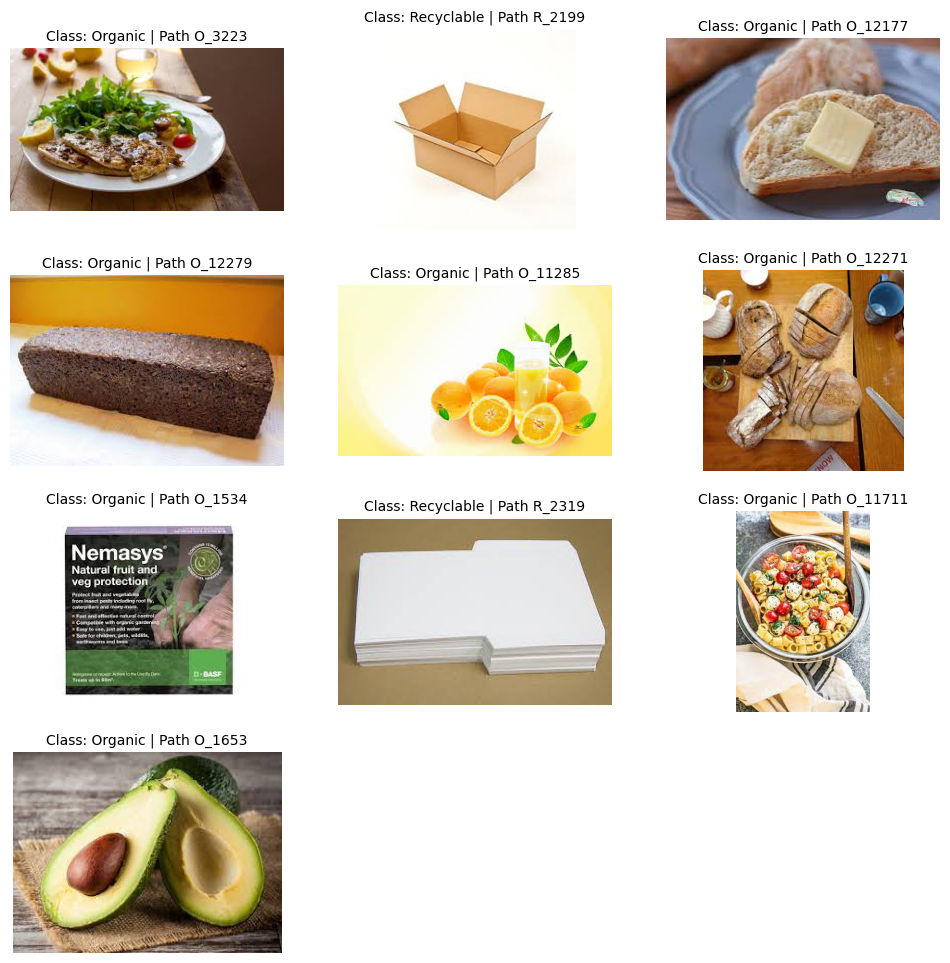

In [91]:
import matplotlib.image as mpimg

def display_image_in_grid(image_paths, grid_size=(4,3)):
    num_images = len(image_paths)
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12,12))

    for i, ax in enumerate(axes.flat):
        ax.axis('off')
        if i < num_images:
            image_path = image_paths[i]
            image = mpimg.imread(image_path)
            ax.imshow(image)
            ax.set_title(f"Class: {image_paths[i].parent.stem} | Path {image_paths[i].stem}", fontsize=10)
        

display_image_in_grid(sample_path_list)

DATASET\TRAIN\Organic\O_3223.jpg
DATASET\TRAIN\Recyclable\R_2199.jpg
DATASET\TRAIN\Organic\O_12177.jpg
DATASET\TRAIN\Organic\O_12279.jpg
DATASET\TRAIN\Organic\O_11285.jpg
DATASET\TRAIN\Organic\O_12271.jpg
DATASET\TRAIN\Organic\O_1534.jpg
DATASET\TRAIN\Recyclable\R_2319.jpg
DATASET\TRAIN\Organic\O_11711.jpg
DATASET\TRAIN\Organic\O_1653.jpg


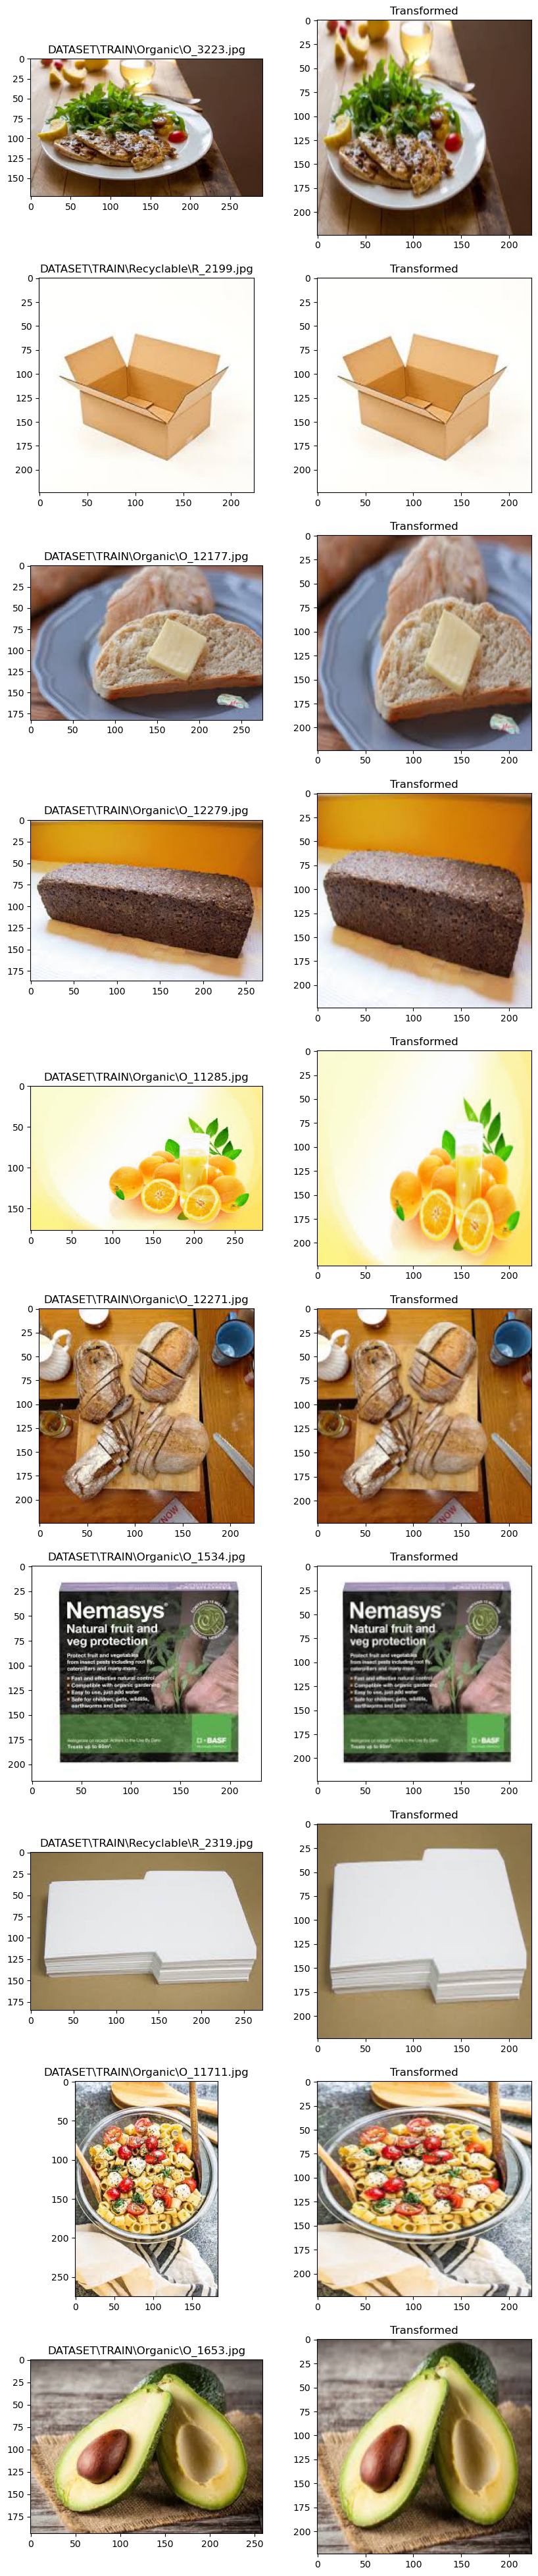

In [92]:
import matplotlib.image as mpimg
from PIL import Image
from torchvision import transforms

image_transform = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

def display_image_before_after_transform(image_paths, transform, grid_size=(10,2)):
    num_images = len(image_paths)
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 5*grid_size[0]))

    for i, ax_row in enumerate(axes):
        image_path = image_paths[i]
        print(image_path)
        for j, ax in enumerate(ax_row):
            # ax.set_title(f"Row: {i} | Col: {j} | Index: {i*2+j}")

            if j == 0:                
                image = mpimg.imread(image_path)
                ax.set_title(f"{image_path}")
                ax.imshow(image)
            else:
                image = Image.open(image_path)
                transformed_image = transform(image).permute(1,2,0) # Convert (C x H x W) to (H x W x C)
                ax.set_title(f"Transformed")
                ax.imshow(transformed_image)        
        

display_image_before_after_transform(sample_path_list, image_transform)

In [95]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_image_dir,
                                 transform=image_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_image_dir,
                                transform=image_transform)

train_data

Dataset ImageFolder
    Number of datapoints: 22564
    Root location: DATASET\TRAIN
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [98]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

!nvidia-smi

cpu
NVIDIA-SMI has failed because you are not:
	a) running as an administrator or
	b) there is not at least one TCC device in the system



In [103]:
class_name = train_data.classes
class_name_idx = train_data.class_to_idx

print(class_name, class_name_idx)

['Organic', 'Recyclable'] {'Organic': 0, 'Recyclable': 1}
